# **Import Packages**

In [154]:
!pip install pingouin

In [155]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Preprocessing Dataset**

In [156]:
# Load the dataset
df=pd.read_csv("Lung_Cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [157]:
# Check the data type
df.shape
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [158]:
# Check for missing values
print(df.isnull().sum())

# Remove missing values
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [159]:
# Get information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [160]:
# Check for duplicates in the dataset
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [161]:
# Drop duplicates in the dataset
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [162]:
# Encode categorical columns (e.g., GENDER and LUNG_CANCER: YES=1, NO=2)
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER']) + 1  # M=1, F=2
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER']) + 1  # YES=1, NO=2

# Print the encoded data
print("\nData after encoding categorical columns (GENDER, LUNG_CANCER):")
print(df[['GENDER', 'LUNG_CANCER']].head())


Data after encoding categorical columns (GENDER, LUNG_CANCER):
   GENDER  LUNG_CANCER
0       2            2
1       2            2
2       1            1
3       2            1
4       1            1


# **Univariate Analysis**

In [163]:
# Create a DataFrame to hold the statistics
statistics = pd.DataFrame()

# Hold the features in a list
# Find the number of features
features = df.columns.tolist()
num_features = len(features)

# Generate DataFrames for each statistic
means_df = np.mean(df, axis=0)
medians_df = df.median()
modes_df = df.mode().iloc[0]
stds_df = df.std()
variances_df = df.var()
mins_df = df.min()
maxs_df = df.max()
ranges_df = maxs_df - mins_df
skewness_df = df.skew()
kurtosis_df = df.kurt()

# Convert the statistical values in the DataFrames to lists
means = [means_df.iloc[i] for i in range(num_features)]
medians = [medians_df.iloc[i] for i in range(num_features)]
modes = [modes_df.iloc[i] for i in range(num_features)]
stds = [stds_df.iloc[i] for i in range(num_features)]
variances = [variances_df.iloc[i] for i in range(num_features)]
mins = [mins_df.iloc[i] for i in range(num_features)]
maxs = [maxs_df.iloc[i] for i in range(num_features)]
ranges = [ranges_df.iloc[i] for i in range(num_features)]
skew_vals = [skewness_df.iloc[i] for i in range(num_features)]
kurtosis_vals = [kurtosis_df.iloc[i] for i in range(num_features)]

# Add the statistical values to the statistics DataFrame
statistics['Features'] = features
statistics['Means'] = means
statistics['Medians'] = medians
statistics['Modes'] = modes
statistics['Standard Deviations'] = stds
statistics['Variances'] = variances
statistics['Minimum Values'] = mins
statistics['Maximum Values'] = maxs
statistics['Ranges'] = ranges
statistics['Skew Values'] = skew_vals
statistics['Kurtosis Values'] = kurtosis_vals

# Print out the statistics DataFrame
statistics.head(16)

,Features,Means,Medians,Modes,Standard Deviations,Variances,Minimum Values,Maximum Values,Ranges,Skew Values,Kurtosis Values
0,GENDER,1.524272,2.0,2,0.500221,0.250221,1,2,1,-0.097677,-2.003469
1,AGE,62.673139,62.0,64,8.210301,67.409049,21,87,66,-0.395086,1.746558
2,SMOKING,1.563107,2.0,2,0.496806,0.246816,1,2,1,-0.255705,-1.947261
3,YELLOW_FINGERS,1.569579,2.0,2,0.495938,0.245955,1,2,1,-0.282425,-1.932789
4,ANXIETY,1.498382,1.0,1,0.500808,0.250809,1,2,1,0.006504,-2.013029
5,PEER_PRESSURE,1.501618,2.0,2,0.500808,0.250809,1,2,1,-0.006504,-2.013029
6,CHRONIC DISEASE,1.504854,2.0,2,0.500787,0.250788,1,2,1,-0.019513,-2.012689
7,FATIGUE,1.673139,2.0,2,0.469827,0.220737,1,2,1,-0.741836,-1.459167
8,ALLERGY,1.556634,2.0,2,0.497588,0.247594,1,2,1,-0.229118,-1.960235
9,WHEEZING,1.556634,2.0,2,0.497588,0.247594,1,2,1,-0.229118,-1.960235


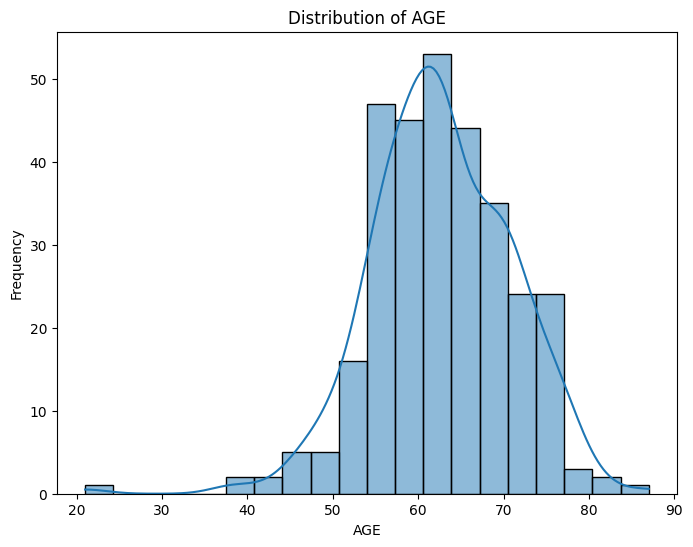

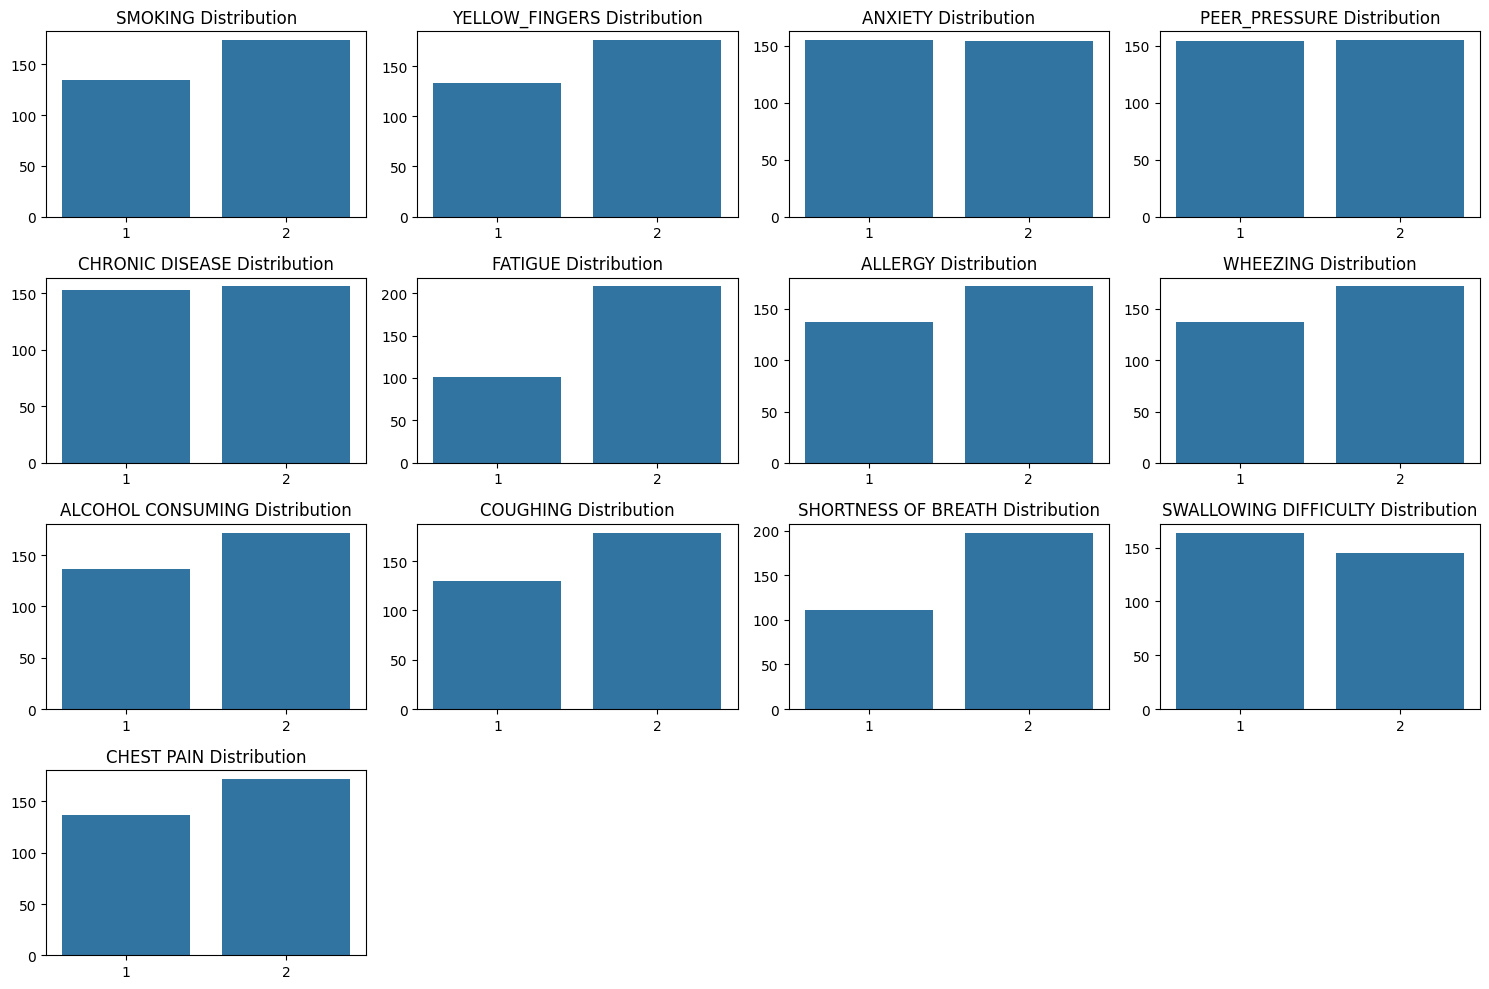

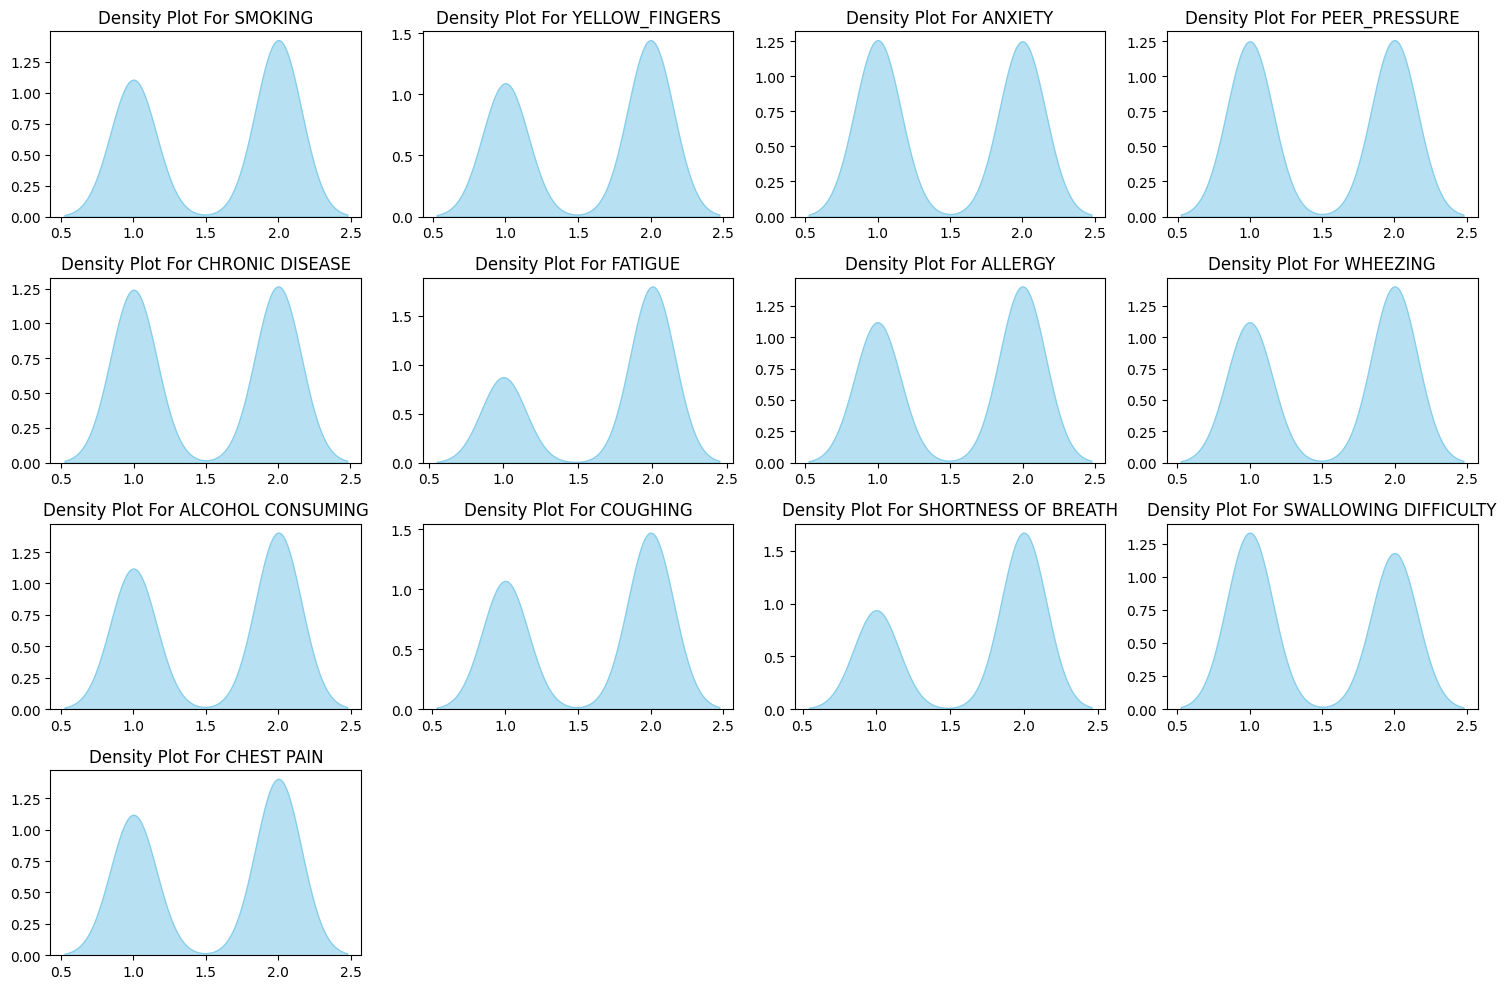

In [164]:
# Remove any leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Visualize the distribution of numerical features using bar chart w/curve
numerical_columns = ['AGE']  # Add more columns if needed
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the binary features using bar charts
binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                  'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
plt.figure(figsize=(15, 10))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualize the binary features using density plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.6)
    plt.title(f'Density Plot For {column}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [165]:
# Obtain the class counts for each category to evaluate if there is imbalance
for column in df.columns:
  print(df[column].value_counts())
  print()

GENDER
2    162
1    147
Name: count, dtype: int64

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

SMOKING
2    174
1    135
Name: count, dtype: int64

YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64

ANXIETY
1    155
2    154
Name: count, dtype: int64

PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64

CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64

FATIGUE
2    208
1    101
Name: count, dtype: int64

ALLERGY
2    172
1    137
Name: count, dtype: int64

WHEEZING
2    172
1    137
Name: count, dtype: int64

ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64

COUGHING
2    179
1    130
Name: count, dtype: int64

SHO

# **Data Scaling and Splitting**

In [166]:
# Scaling all numerical features except the target ('LUNG_CANCER')
scaler = StandardScaler()
numerical_columns = df.columns[df.columns != 'LUNG_CANCER']  # All columns except 'LUNG_CANCER'
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the scaled data
print("\nData after scaling numerical columns:")
print(df.head())


Data after scaling numerical columns:
     GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0  0.952579  0.771850 -1.135292        0.869300  1.003241      -1.003241   
1  0.952579  1.381829  0.880830       -1.150351 -0.996769      -1.003241   
2 -1.049781 -0.448107 -1.135292       -1.150351 -0.996769       0.996769   
3  0.952579  0.039876  0.880830        0.869300  1.003241      -1.003241   
4 -1.049781  0.039876 -1.135292        0.869300 -0.996769      -1.003241   

   CHRONIC DISEASE   FATIGUE   ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -1.009756  0.696833 -1.120480  0.892475           0.892475  0.852207   
1         0.990338  0.696833  0.892475 -1.120480          -1.120480 -1.173424   
2        -1.009756  0.696833 -1.120480  0.892475          -1.120480  0.852207   
3        -1.009756 -1.435063 -1.120480 -1.120480           0.892475 -1.173424   
4        -1.009756 -1.435063 -1.120480  0.892475          -1.120480  0.852207   

   SHORTNESS OF B

In [167]:
# Split the dataset into training and testing sets
X = df.drop('LUNG_CANCER', axis=1)  # Features
y = df['LUNG_CANCER']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the dataset shapes to confirm
print("Training X set shape:", X_train.shape)
print("Testing X set shape:", X_test.shape)
print("Training y target shape:", y_train.shape)
print("Testing y target shape:", y_test.shape)

Training X set shape: (247, 15)
Testing X set shape: (62, 15)
Training y target shape: (247,)
Testing y target shape: (62,)


# **Correlation analysis**

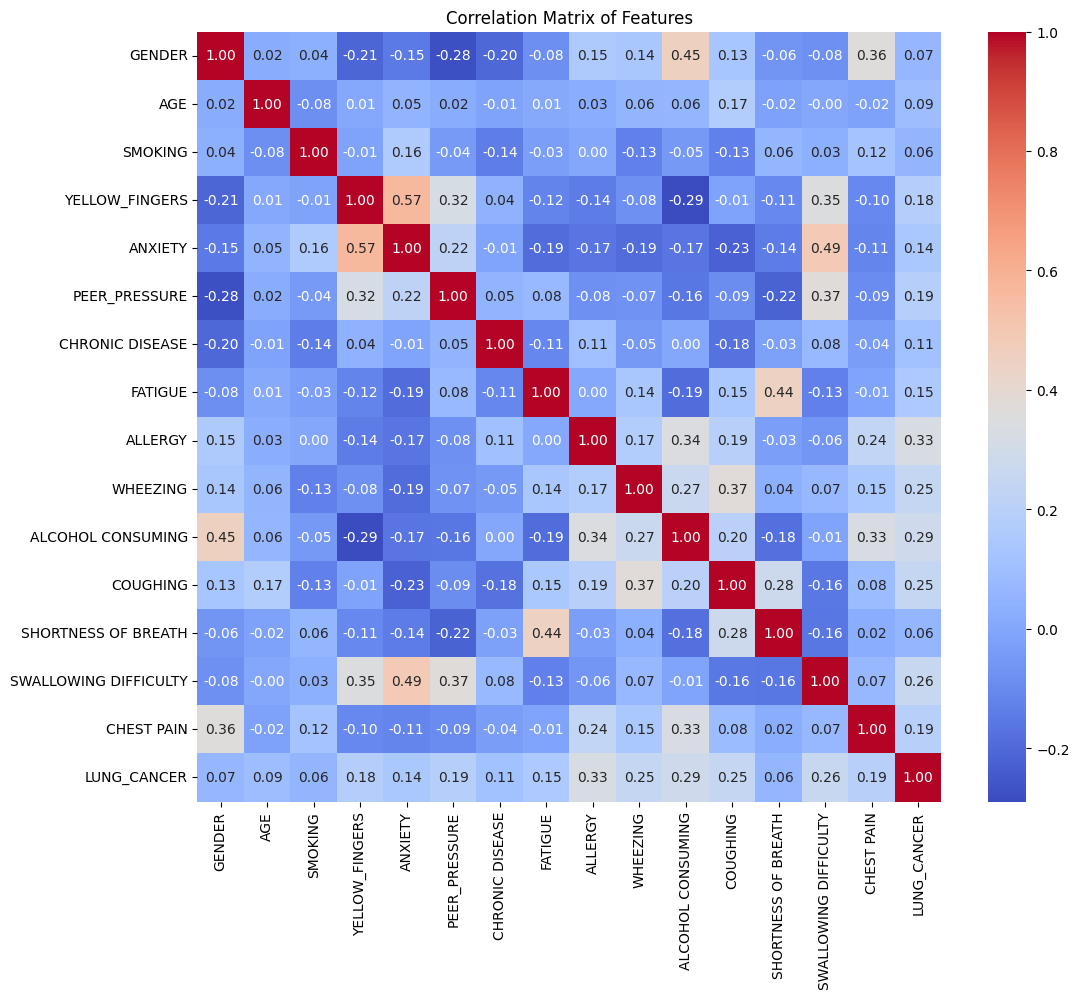

In [168]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

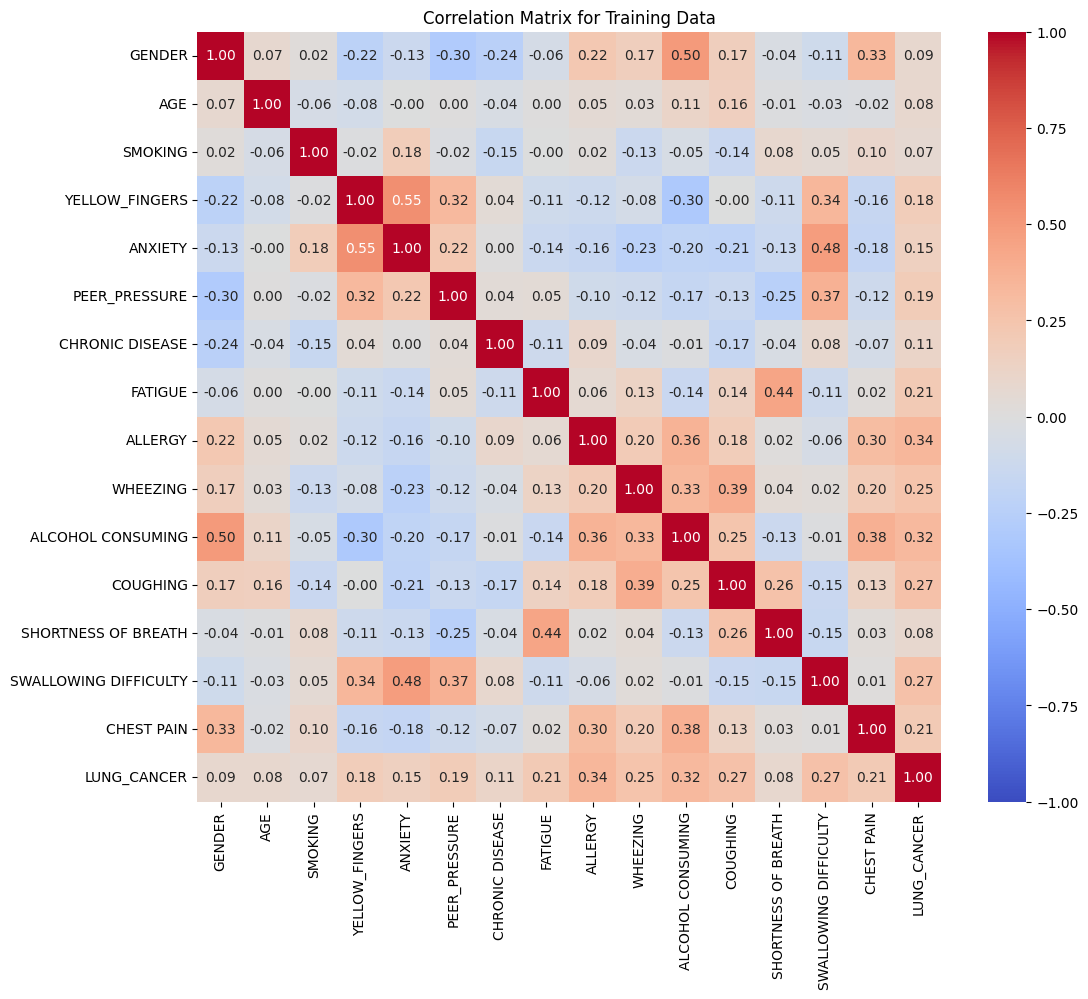


Correlation of each feature with LUNG_CANCER:
 LUNG_CANCER              1.000000
ALLERGY                  0.335991
ALCOHOL CONSUMING        0.320463
SWALLOWING DIFFICULTY    0.272262
COUGHING                 0.266227
WHEEZING                 0.252148
CHEST PAIN               0.206604
FATIGUE                  0.205063
PEER_PRESSURE            0.187774
YELLOW_FINGERS           0.183833
ANXIETY                  0.151626
CHRONIC DISEASE          0.109569
GENDER                   0.085816
AGE                      0.084629
SHORTNESS OF BREATH      0.081827
SMOKING                  0.068035
Name: LUNG_CANCER, dtype: float64

Highly correlated feature pairs (absolute correlation > 0.7):
 Series([], dtype: float64)


In [169]:
# Merge 'LUNG_CANCER' back into X_train temporarily for correlation analysis with the target
X_train_with_target = X_train.copy()
X_train_with_target['LUNG_CANCER'] = y_train

# Step 1: Calculate the correlation matrix
correlation_matrix = X_train_with_target.corr()

# Step 2: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Training Data")
plt.show()

# Step 3: Analyze correlations
# Extract correlations of each feature with 'LUNG_CANCER'
lung_cancer_corr = correlation_matrix['LUNG_CANCER'].sort_values(ascending=False)
print("\nCorrelation of each feature with LUNG_CANCER:\n", lung_cancer_corr)

# Optional: Identify highly correlated features within X_train
# Select pairs with absolute correlation above a certain threshold (e.g., 0.7)
threshold = 0.7
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Exclude self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("\nHighly correlated feature pairs (absolute correlation > 0.7):\n", high_corr_pairs)

In [170]:
# Calculate partial correlations with 'LUNG_CANCER' while controlling for all other features
partial_corr = pg.partial_corr(data=X_train_with_target, x='LUNG_CANCER', y=X_train.columns.tolist(), covar=X_train.columns.difference(['LUNG_CANCER']).tolist())
print("\nPartial Correlations with LUNG_CANCER:\n", partial_corr)


Partial Correlations with LUNG_CANCER:
            n         r          CI95%     p-val
pearson  247 -0.005051  [-0.14, 0.13]  0.940889


In [171]:
# Calculate VIF for each feature in X_train
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Variance Inflation Factor (VIF) for each feature:
                   feature       VIF
0                  GENDER  1.573117
1                     AGE  1.059304
2                 SMOKING  1.154754
3          YELLOW_FINGERS  1.808315
4                 ANXIETY  1.991064
5           PEER_PRESSURE  1.469956
6         CHRONIC DISEASE  1.197726
7                 FATIGUE  1.412323
8                 ALLERGY  1.261267
9                WHEEZING  1.394103
10      ALCOHOL CONSUMING  1.905468
11               COUGHING  1.513792
12    SHORTNESS OF BREATH  1.524239
13  SWALLOWING DIFFICULTY  1.569841
14             CHEST PAIN  1.315378


In [172]:
# Calculate point-biserial correlations between binary features and LUNG_CANCER
binary_features = X_train.columns  # Replace with binary features only if needed
biserial_corrs = {feature: pointbiserialr(X_train_with_target[feature], y_train)[0] for feature in binary_features}

print("\nPoint-Biserial Correlations with LUNG_CANCER:\n", biserial_corrs)


Point-Biserial Correlations with LUNG_CANCER:
 {'GENDER': 0.08581624691160439, 'AGE': 0.08462929719977397, 'SMOKING': 0.0680345699342569, 'YELLOW_FINGERS': 0.18383280912708055, 'ANXIETY': 0.1516262127293482, 'PEER_PRESSURE': 0.18777400104623512, 'CHRONIC DISEASE': 0.10956889466272621, 'FATIGUE': 0.20506250818937616, 'ALLERGY': 0.33599086371292314, 'WHEEZING': 0.25214780991101565, 'ALCOHOL CONSUMING': 0.32046281069495064, 'COUGHING': 0.26622685186403666, 'SHORTNESS OF BREATH': 0.0818273510038963, 'SWALLOWING DIFFICULTY': 0.2722620505814959, 'CHEST PAIN': 0.2066044760550589}


In [173]:
# Train a Random Forest and get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:\n", feature_importances)


Feature Importances from Random Forest:
                   Feature  Importance
1                     AGE    0.191700
10      ALCOHOL CONSUMING    0.087450
8                 ALLERGY    0.077829
5           PEER_PRESSURE    0.070945
3          YELLOW_FINGERS    0.067888
7                 FATIGUE    0.062300
11               COUGHING    0.062246
13  SWALLOWING DIFFICULTY    0.056690
9                WHEEZING    0.052489
4                 ANXIETY    0.051987
6         CHRONIC DISEASE    0.049473
14             CHEST PAIN    0.049104
12    SHORTNESS OF BREATH    0.042479
2                 SMOKING    0.039773
0                  GENDER    0.037647


# **Building Models**

## **Logistic Regression**

In [174]:
# Set the parameters grid that the cross-validation will run on
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 20000], 'solver': ['lbfgs', 'liblinear', 'saga']}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)

# Perform the Grid Search CV with a regression scoring metric
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated mean squared error: ", -grid_search.best_score_)

Best parameters found:  {'C': 10, 'solver': 'lbfgs'}
Best cross-validated mean squared error:  0.08081632653061224


In [175]:
# Create and fit Logistic Regression model on the training dataset
lr_model = LogisticRegression(solver='saga', max_iter=10000, C=10.0, penalty = 'l2', random_state=42)
lr_model.fit(X_train, y_train)

# Run the Logistic Regression model on the validation dataset
y_pred_test = lr_model.predict(X_test)

# Calculate the metrics on the validation dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the validation dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.984
Validation Precision: 1.000
Validation Recall: 0.500
Validation F1: 0.667


## **Gradient Boosting Classifier**

In [176]:
# Set the parameters grid that the cross-validation will run on
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.5], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10]}

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Perform the Grid Search CV with a regression scoring metric
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated mean squared error: ", -grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validated mean squared error:  0.10138775510204083


In [177]:
# Create and fit Gradient Boosting Classifier on the training dataset
gb_model = GradientBoostingClassifier(learning_rate = 0.01, max_depth=4, min_samples_split=5, n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)

# Run the Gradient Boosting Classifier on the validation dataset
y_pred_test = gb_model.predict(X_test)

# Calculate the metrics on the validation dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the validation dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.968
Validation Precision: 0.500
Validation Recall: 0.500
Validation F1: 0.500
